Epoch 1/40


c:\Users\ANSH KEDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.2954 - loss: 1.4935 - val_accuracy: 1.0000 - val_loss: 0.8476
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7061 - loss: 0.8249 - val_accuracy: 1.0000 - val_loss: 0.3034
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9171 - loss: 0.3107 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9856 - loss: 0.0658 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9930 - loss: 0.0344 - val_accuracy: 1.0000 - val_loss: 2.3734e-04
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 4.3699e-04
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 3.3012e-04
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 4.089

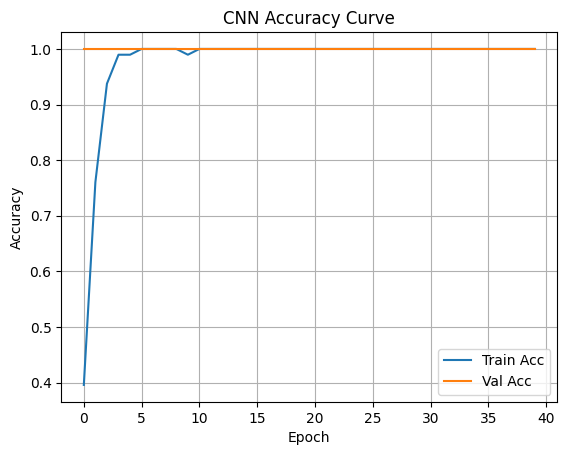

In [1]:
# model_training_notebook.ipynb

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Constants
DATASET_DIR = 'dataset'
IMG_SIZE = (100, 100)
MODEL_PATH = 'trained_model/cnn_face_model.h5'
LABELS_PATH = 'trained_model/label_classes.npy'
os.makedirs('trained_model', exist_ok=True)

# Step 1: Load Data
images, labels = [], []
for folder in os.listdir(DATASET_DIR):
    folder_path = os.path.join(DATASET_DIR, folder)
    if not os.path.isdir(folder_path):
        continue
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(folder)

X = np.array(images)
y = np.array(labels)

# Step 2: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 4: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=16)

# Step 6: Save model & label encoder
model.save(MODEL_PATH)
np.save(LABELS_PATH, le.classes_)

# Step 7: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [2]:
# Step 6.1: Evaluate final accuracy
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Final Validation/Test Accuracy: {test_acc * 100:.2f}%")


✅ Final Training Accuracy: 100.00%
✅ Final Validation/Test Accuracy: 100.00%
